In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv("/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Brand goodwill mapping
brand_goodwill = {
    "ritz": 6, "sx4": 7, "ciaz": 8, "wagon r": 6, "swift": 8, "vitara brezza": 9,
    "alto": 5, "ertiga": 8, "baleno": 8, "omni": 5, "fortuner": 10, "innova": 9,
    "corolla": 9, "etios": 8, "creta": 9, "verna": 8, "i20": 8, "grand i10": 7,
    "brio": 6, "city": 9, "amaze": 7, "jazz": 8, "cr-v": 9, "accord": 10,
    "br-v": 8, "xcent": 7, "micra": 7, "sunny": 7, "pulse": 6, "scala": 6,
    "kwid": 6, "duster": 8, "triber": 6, "bolero": 7, "scorpio": 9, "xuv500": 9,
    "thar": 9, "alturas g4": 9, "marazzo": 7
}
df['Brand_Goodwill'] = df['Car_Name'].str.lower().map(brand_goodwill).fillna(6)

In [5]:
# Feature Engineering
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Brand_Goodwill,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6.0,11,False,True,False,True
1,4.75,9.54,43000,0,7.0,12,True,False,False,True
2,7.25,9.85,6900,0,8.0,8,False,True,False,True
3,2.85,4.15,5200,0,6.0,14,False,True,False,True
4,4.60,6.87,42450,0,8.0,11,True,False,False,True


In [6]:
# Features and Target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 3.43
R² Score: 0.85


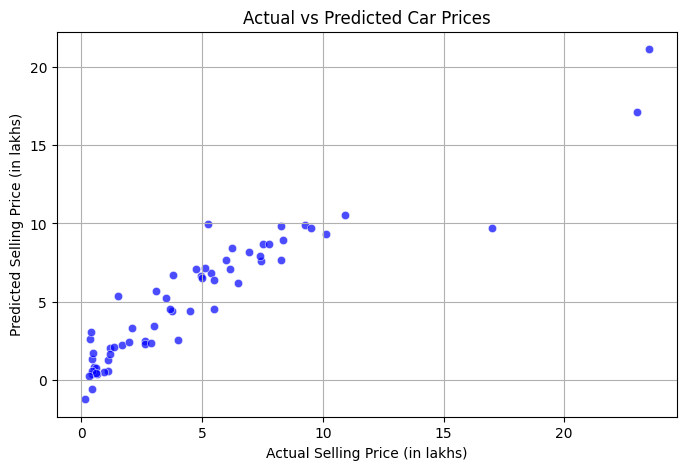

In [9]:
# Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Selling Price (in lakhs)")
plt.ylabel("Predicted Selling Price (in lakhs)")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()

In [11]:
# Sample Prediction
# The order of features should be:
# 'Present_Price', 'Driven_kms', 'Owner', 'Brand_Goodwill', 'Car_Age',
# 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual'
sample_input = np.array([[5.59, 27000, 0, 6, 11, 0, 1, 0, 1]]) # Added missing Selling_type_Individual feature
predicted_price = model.predict(sample_input.reshape(1, -1))[0]
print(f"Predicted Price for sample input: ₹{predicted_price:.2f} lakhs")

Predicted Price for sample input: ₹3.32 lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
